## Example with the class ClassificationRF defined in classyRF.py

In [1]:
import classyRF
import numpy as np
import matplotlib.pyplot as plt


C:\Users\marin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
import importlib
importlib.reload(classyRF)

<module 'classyRF' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\classyRF.py'>

In [2]:
path = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\NS_dataset_NOPUBLIC\\"

In [3]:
i_m1i=1; i_m2i=2; i_x1i=3; i_x2i=4; i_mci=5; i_qi=6; i_Ri=7; i_Ci=8; 
i_m1r=9; i_m2r=10; i_x1r=11; i_x2r=12; i_mcr=13; i_qr=15; i_Rr=16; i_Cr=17;
i_snr=18;
injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_mci, i_qi, i_Ri, i_Ci, i_snr]
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_Cr, i_snr]
independent_injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

loading  C:\Users\marin\Desktop\ML_workingGroup\NS_dataset_NOPUBLIC\rec_crossvalidated.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
mc_rec
q_rec
R_isco_rec
Compactness_rec
snr
Score on testing:  0.9745329088818147
******Confusion matrix******


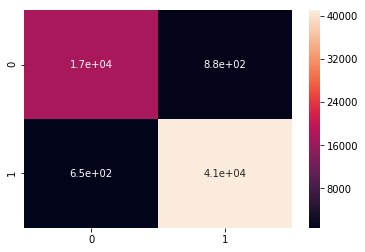

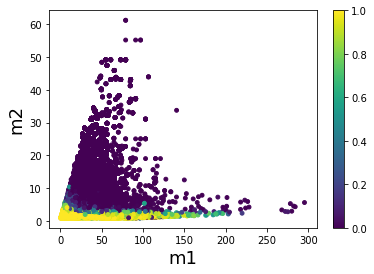

<Figure size 432x288 with 0 Axes>

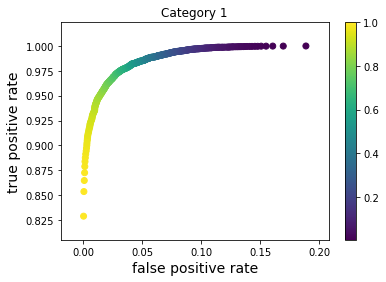

<Figure size 432x288 with 0 Axes>

In [17]:
#Recover last session
RF = classyRF.ClassificationRF()
RF.load_train_dataset(path, fname_x='train_NS.csv')
RF.load_test_dataset(path, fname_x='test_NS.csv')
RF.loadModel(path, 'rec_crossvalidated')
RF.subset_features(recovered_index)
RF.save_plots=True
RF.print_metrics(path)
RF.analysis_plot(path)

Score on testing:  0.9747829130485508
******Confusion matrix******


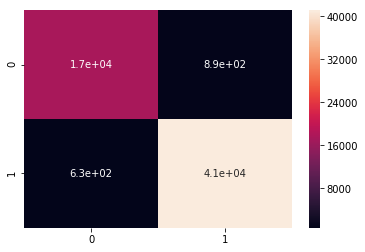

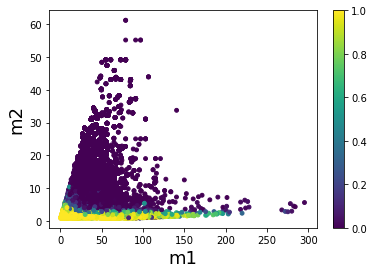

<Figure size 432x288 with 0 Axes>

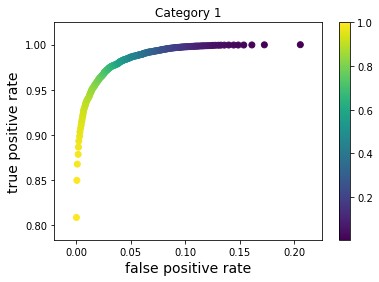

<Figure size 432x288 with 0 Axes>

# Injected values for reference

Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
mc_inj
q_inj
R_isco_inj
Compactness_inj
snr
Score on testing:  0.9999833330555509
******Confusion matrix******


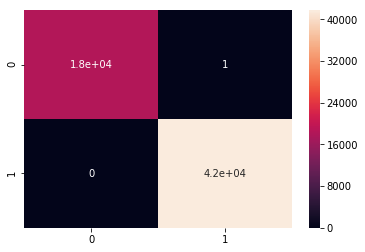

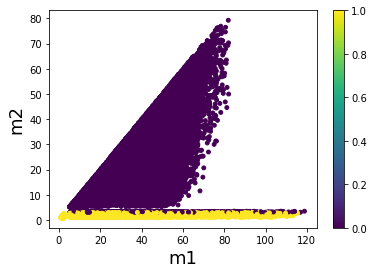

<Figure size 432x288 with 0 Axes>

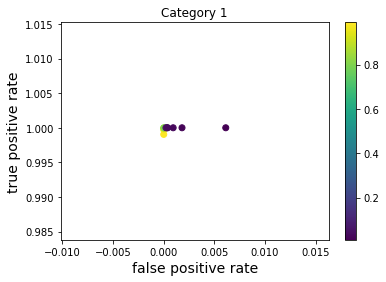

<Figure size 432x288 with 0 Axes>

In [14]:
RFi=classyRF.ClassificationRF()
RFi.load_train_dataset(path, fname_x='train_NS.csv')
RFi.load_test_dataset(path, fname_x='test_NS.csv')
RFi.subset_features(injected_index)
RFi.train()
RFi.save_plots=True
RFi.print_metrics(path)
RFi.analysis_plot(path)

Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
snr
Score on testing:  0.9999833330555509
******Confusion matrix******


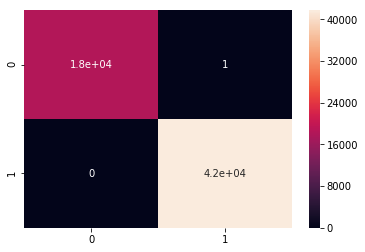

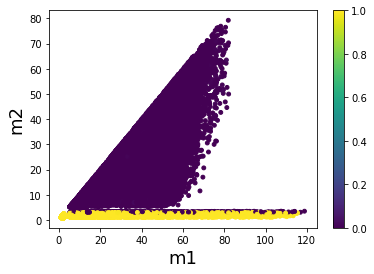

<Figure size 432x288 with 0 Axes>

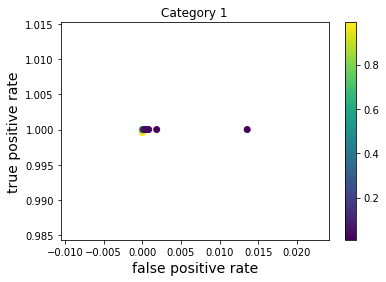

<Figure size 432x288 with 0 Axes>

In [15]:
RFii=classyRF.ClassificationRF()
RFii.load_train_dataset(path, fname_x='train_NS.csv')
RFii.load_test_dataset(path, fname_x='test_NS.csv')
RFii.subset_features(independent_injected_index)
RFii.train()
RFii.save_plots=True
RFii.print_metrics(path)
RFii.analysis_plot(path)

## Crossvalidations done

In [31]:
#Independent recovered
RF.subset_features(independent_recovered_index)
optimum = RF.crossvalidation()
RF.train( trees=optimum[0], criterion=optimum[1], max_features=optimum[2])
RF.saveModel(path,'ind_rec_crossvalidated')

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr
Standard deviation of score during crossvalidation:  0.000277942225285724 . Mean:  0.9744487408123469
Score  0.9748495808263471 . Optimum forest found:  200  trees,  entropy  criteria and  sqrt  max features


In [16]:
# recovered
RFr=classyRF.ClassificationRF()
RFr.load_train_dataset(path, fname_x='train_NS.csv')
RFr.load_test_dataset(path, fname_x='test_NS.csv')
RFr.subset_features(recovered_index)
optimum = RF.crossvalidation()
RFr.train( trees=optimum[0], criterion=optimum[1], max_features=optimum[2])
RFr.saveModel(path,'rec_crossvalidated')

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
mc_rec
q_rec
R_isco_rec
Compactness_rec
snr
Standard deviation of score during crossvalidation:  0.0002807499052054315 . Mean:  0.9744466574442907
Score  0.975032917215287 . Optimum forest found:  400  trees,  entropy  criteria and  sqrt  max features
